<a href="https://colab.research.google.com/github/dhirajsuvarna/nlp_text_classification/blob/master/hackathon/ULMFit_Drug_Review_Classification_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading DataSet from Google Drive

In [51]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai.text import * 

#Load the Traning and Validation Dataset
df_train = pd.read_csv('/content/drive/My Drive/Projects/AnalyticsHackathon/dataset/drugsComTrain_raw.csv')
df_valid = pd.read_csv('/content/drive/My Drive/Projects/AnalyticsHackathon/dataset/drugsComTest_raw.csv')

##Removing Empty Cells and Invalid Cells





In [53]:
df_train = df_train[['condition', 'review']]
df_valid = df_valid[['condition', 'review']]
print (f"#Train Examples: {df_train.shape}")
print (f"#Validation Examples: {df_valid.shape}")

#print(df_train[df_train['condition'].isna()])
print(f"#NaN in Train: {df_train[df_train['condition'].isna()].shape}")
print(f"#NaN in Validation: {df_valid[df_valid['condition'].isna()].shape}")

#Reomve the rows with empty(nan) 'condition' or empty(nan) 'review'
print("Removing rows with nan values...")
df_train = df_train.dropna()
df_valid = df_valid.dropna()



#Train Examples: (161297, 2)
#Validation Examples: (53766, 2)
#NaN in Train: (899, 2)
#NaN in Validation: (295, 2)
Removing rows with nan values...


In [54]:
#print(df_train[df_train['condition'].str.contains('users found this comment helpful')])
print(f"#'users found this comment useful' in Train: {df_train[df_train['condition'].str.contains('users found this comment helpful')].shape}")
print(f"#'users found this comment useful'in Validation: {df_valid[df_valid['condition'].str.contains('users found this comment helpful')].shape}")

#Remove the rows where 'condition' is "users found this comment helpful"
print("Removing the rows where condition is 'users found this comment helpful'")
df_train = df_train[~df_train['condition'].str.contains('users found this comment helpful')]
df_valid = df_valid[~df_valid['condition'].str.contains('users found this comment helpful')]

df_train = df_train[['condition', 'review']]
df_valid = df_valid[['condition', 'review']]
print (f"#Train Examples: {df_train.shape}")
print (f"#Validation Examples: {df_valid.shape}")

#'users found this comment useful' in Train: (900, 2)
#'users found this comment useful'in Validation: (271, 2)
Removing the rows where condition is 'users found this comment helpful'
#Train Examples: (159498, 2)
#Validation Examples: (53200, 2)


##Remove Mismatch of Classes between Validation and Training Set

In [55]:
#Number of classes present in the training and validation set
targets_train = df_train['condition'].unique()
targets_valid = df_valid['condition'].unique()
print(f"#Target Classes in Train: {len(targets_train)}")
print(f"#Target Classes in Validation: {len(targets_valid)}")

targets_only_in_valid = [item for item in targets_valid if item not in targets_train]
print(f"#Targets in Validation but not in Training: {len(targets_only_in_valid)}")


#Target Classes in Train: 811
#Target Classes in Validation: 664
#Targets in Validation but not in Training: 25


In [56]:
#Remove the items from Validation Set for which classes are present in Validation but not present in the Training Set
#print(f"#Invalid Validation examples: {df_valid[df_valid['condition'].isin(targets_only_in_valid)].shape}")

df_valid = df_valid[~df_valid['condition'].isin(targets_only_in_valid)]

df_train = df_train[['condition', 'review']]
df_valid = df_valid[['condition', 'review']]
print (f"#Train Examples: {df_train.shape}")
print (f"#Validation Examples: {df_valid.shape}")

#Train Examples: (159498, 2)
#Validation Examples: (53161, 2)


In [57]:
#Check the Classes which are present in the Training Set but not present in the Validation Set
targets_only_in_train = [item for item in targets_train if item not in targets_valid]
print(f"#Targets in Training but not in Validation: {len(targets_only_in_train)}")

df_only_in_train = df_train[df_train['condition'].isin(targets_only_in_train)]
print(f"Training Examples only in Training Set: {df_only_in_train.shape}")



#Targets in Training but not in Validation: 172
Training Examples only in Training Set: (419, 2)


Distribution of Training Examples for those classes
(-0.001, 10.0]    171
(10.0, 50.0]        1
(50.0, 100.0]       0
Name: condition, dtype: int64


Text(0.5, 0, '#Classes')

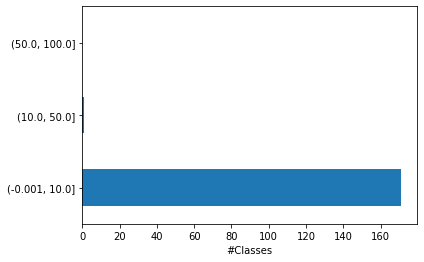

In [64]:
#Let us see the distribution of Traning Examples for the above classes
print("Distribution of Training Examples for those classes")
only_in_train_bins = [0, 10, 50, 100]
out_only_in_train = pd.cut(df_only_in_train['condition'].value_counts(), bins=only_in_train_bins, include_lowest =True)
out_only_in_train = out_only_in_train.value_counts().reindex(out_only_in_train.cat.categories)
print(out_only_in_train)
axes = out_only_in_train.plot.barh()
axes.set_xlabel('#Classes')
# axes = df_only_in_train['condition'].value_counts().plot.hist()
# axes.set_xlabel('#Training Examples')
# axes.set_ylabel('#Conditions')

In [59]:
#We can see that there are 419 Training examples for which 172 classes are present in Traning set but not the validation set
#To make the Traning and Validation Set Balanced, removing those 419 Traning Examples
print("Making Training Set and Validation Set balanced in terms of #classes") 
df_train = df_train[~df_train['condition'].isin(targets_only_in_train)]

df_train = df_train[['condition', 'review']]
df_valid = df_valid[['condition', 'review']]
print (f"#Train Examples: {df_train.shape}")
print (f"#Validation Examples: {df_valid.shape}")

Making Training Set and Validation Set balanced in terms of #classes
#Train Examples: (159079, 2)
#Validation Examples: (53161, 2)


Let us see the Distribution of Training Examples
(-0.001, 19.0]        321
(19.0, 50.0]           94
(50.0, 100.0]          75
(100.0, 500.0]         89
(500.0, 5000.0]        55
(5000.0, 10000.0]       4
(10000.0, 20000.0]      0
(20000.0, 30000.0]      1
Name: condition, dtype: int64


Text(0.5, 0, '#Classes')

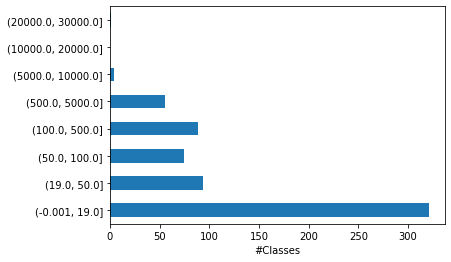

In [93]:
print("Let us see the Distribution of Training Examples")
train_bins = [0, 19, 50, 100, 500, 5000, 10000, 20000, 30000]
out_train = pd.cut(df_train['condition'].value_counts(), bins=train_bins, include_lowest =True)
out_train = out_train.value_counts().reindex(out_train.cat.categories)
print(out_train)
axes = out_train.plot.barh()
axes.set_xlabel('#Classes')

#Analysis of Precision and Recall Report 

In [0]:
df_clas_report = pd.read_csv('/content/Classification_Report_ULMFit.csv')

In [72]:
recall_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.84, 1.0]
clas_report_out = pd.cut(df_clas_report['recall'], bins=recall_bins, include_lowest =True)
clas_report_out = clas_report_out.value_counts().reindex(clas_report_out.cat.categories)
print(f"Distribution of Recall Values : ")
print(clas_report_out)

Distribution of Recall Values : 
(-0.001, 0.1]    394
(0.1, 0.2]        29
(0.2, 0.3]        18
(0.3, 0.4]        23
(0.4, 0.5]        18
(0.5, 0.6]        27
(0.6, 0.84]       90
(0.84, 1.0]       40
Name: recall, dtype: int64


Text(0.5, 0, '#Classes')

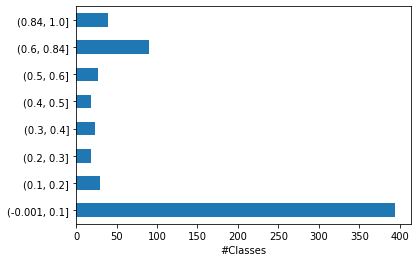

In [73]:
axes = clas_report_out.plot.barh()
axes.set_xlabel("#Classes")

According to the above distribution the model has prediction accuracy of **more than 85%** on **40** classes. 

Let us see how many training examples were present for these **40** classes. 



In [0]:
#df_clas_report[df_clas_report['recall'] >= 0.85]['condition'].count()
# for item in df_clas_report[df_clas_report['recall'] >= 0.85]['condition']:
#     review_count = df_train[df_train['condition'] == item]['review'].count()
#     print(f"{item}:{review_count}")

df_good_accuracy = df_clas_report[df_clas_report['recall'] >= 0.85]
df_good_accuracy['training_examples'] = ""
#df_good_accuracy.head()
for item in df_good_accuracy['condition']:
    review_count = df_train[df_train['condition'] == item]['review'].count()
    df_good_accuracy.loc[df_good_accuracy['condition'] == item, 'training_examples'] = review_count
    #print(f"{item}:{review_count}")



In [92]:
df_good_accuracy = df_good_accuracy.sort_values(by='training_examples', ascending=False)
df_good_accuracy.head(40)

,condition,precision,recall,f1-score,support,review_count
75,Birth Control,0.93,0.97,0.95,9648,28788
5,Acne,0.92,0.93,0.92,1847,5588
297,Insomnia,0.80,0.88,0.83,1231,3673
0,ADHD,0.83,0.91,0.86,1126,3383
162,"Diabetes, Type 2",0.79,0.89,0.84,808,2554
188,Emergency Contraception,0.97,0.98,0.98,827,2463
254,High Blood Pressure,0.68,0.87,0.76,783,2321
596,Vaginal Yeast Infection,0.92,0.96,0.94,811,2274
82,Bowel Preparation,0.95,0.96,0.96,639,1859
533,Smoking Cessation,0.97,0.96,0.96,660,1780


The above table shows that, with the training of as low as **20**, the model is able to correctly predict a particular class. 

In this case the class was **Non-Hodgkin's Lymphoma**

In [94]:
df_bad_accuracy = df_clas_report[df_clas_report['recall'] < 0.85]
df_bad_accuracy['training_examples'] = ""
#df_good_accuracy.head()
for item in df_bad_accuracy['condition']:
    review_count = df_train[df_train['condition'] == item]['review'].count()
    df_bad_accuracy.loc[df_bad_accuracy['condition'] == item, 'training_examples'] = review_count


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
df_bad_accuracy = df_bad_accuracy[df_bad_accuracy['training_examples'] >= 20]
df_bad_accuracy = df_bad_accuracy.sort_values(by='training_examples', ascending=False)

In [101]:
df_bad_accuracy.head(300)

,condition,precision,recall,f1-score,support,training_examples
153,Depression,0.61,0.80,0.70,3095,9069
422,Pain,0.59,0.83,0.69,2100,6145
42,Anxiety,0.60,0.73,0.66,1908,5904
74,Bipolar Disorde,0.72,0.78,0.75,1380,4224
609,Weight Loss,0.68,0.72,0.70,1248,3609
...,...,...,...,...,...,...
53,Atrial Flutte,0.00,0.00,0.00,8,21
343,Meniere's Disease,0.00,0.00,0.00,8,20
37,Angina Pectoris Prophylaxis,0.00,0.00,0.00,9,20
321,Lennox-Gastaut Syndrome,0.00,0.00,0.00,5,20
